In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

## Importing the CSV File

In [135]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Assigning the independent and dependent variables

In [136]:
X = df[df.columns[:-1]]
X.head()

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [137]:
y = df["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Assigning the training and testing data

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training up the regression model

In [139]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [140]:
print("Intercept: ", mlr.intercept_)
print("Coefficient: ")
list(zip(X,mlr.coef_))

Intercept:  2.9065270863618125
Coefficient: 


[('Unnamed: 0', np.float64(0.0006435900404990057)),
 ('TV', np.float64(0.044718351530283085)),
 ('Radio', np.float64(0.18925118428501722)),
 ('Newspaper', np.float64(0.0030457661251665252))]

## Testing the model

In [141]:
y_pred = mlr.predict(X_test)
df_results = pd.DataFrame({"Real Values": y_test, "Predicted Values": y_pred})
df_results

,Real Values,Predicted Values
95,16.9,16.412277
15,22.4,20.843193
30,21.4,21.511869
158,7.3,10.653100
128,24.7,22.124058
115,12.6,13.123835
69,22.3,21.037489
170,8.4,7.503854
174,11.5,13.647870
45,14.9,15.120409


## Checking Deviation

In [142]:
mse = mean_squared_error(y_test, y_pred)
mse

3.1990044685889067

In [143]:
rmse = root_mean_squared_error(y_test,y_pred)
rmse

1.7885761008659673

In [144]:
dev = y_test - y_pred
dev_list = list(dev)
df_results['Deviation'] = dev_list
df_results

,Real Values,Predicted Values,Deviation
95,16.9,16.412277,0.487723
15,22.4,20.843193,1.556807
30,21.4,21.511869,-0.111869
158,7.3,10.653100,-3.353100
128,24.7,22.124058,2.575942
115,12.6,13.123835,-0.523835
69,22.3,21.037489,1.262511
170,8.4,7.503854,0.896146
174,11.5,13.647870,-2.147870
45,14.9,15.120409,-0.220409


In [145]:
r2 = r2_score(y_test,y_pred)
r2

0.898648915141708

In [146]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.465060105010293

## Checking for Underfitting and Overfitting

In [147]:
print("Training Set Evaluation:")
y_pred_train = mlr.predict(X_train)
print("R2 Score (Train):", r2_score(y_train, y_pred_train))
print("RMSE (Train):", root_mean_squared_error(y_train, y_pred_train))

print("\nTesting Set Evaluation:")
print("R2 Score (Test):", r2_score(y_test, y_pred))
print("RMSE (Test):", root_mean_squared_error(y_test, y_pred))

Training Set Evaluation:
R2 Score (Train): 0.8957553000540606
RMSE (Train): 1.644298208650995

Testing Set Evaluation:
R2 Score (Test): 0.898648915141708
RMSE (Test): 1.7885761008659673


## Plotting the Results

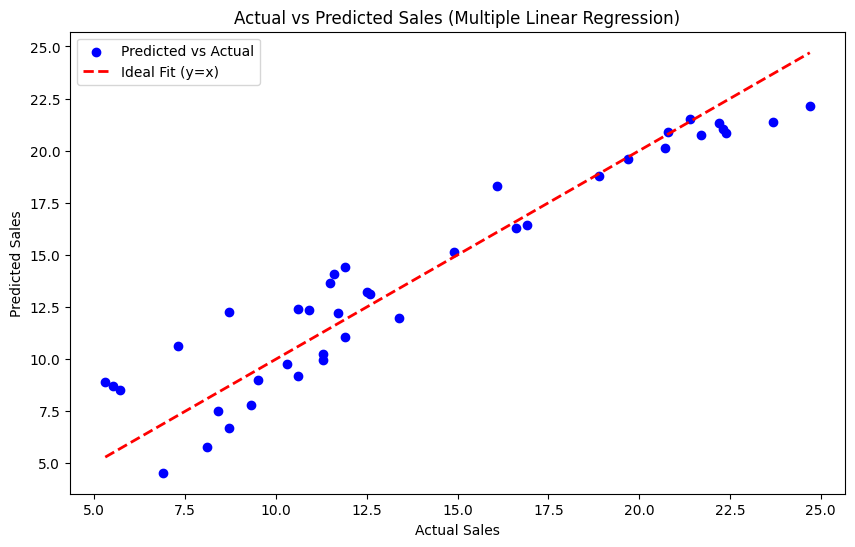

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit (y=x)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Multiple Linear Regression)')
plt.legend()
plt.show()


## Plotting TV vs Sales

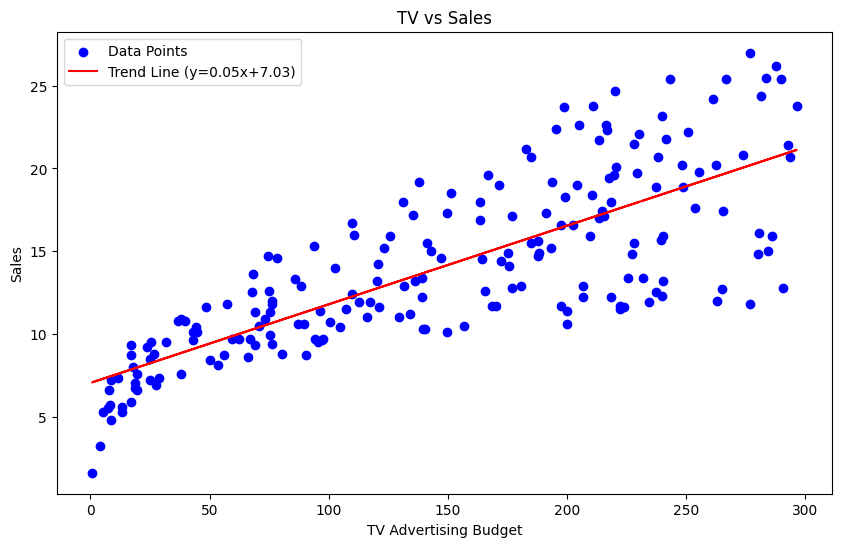

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'], color='blue', label='Data Points')
m, b = np.polyfit(df['TV'], df['Sales'], 1)
plt.plot(df['TV'], m*df['TV'] + b, color='red', label=f'Trend Line (y={m:.2f}x+{b:.2f})')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.legend()
plt.show()

## Plotting Radio vs Sales

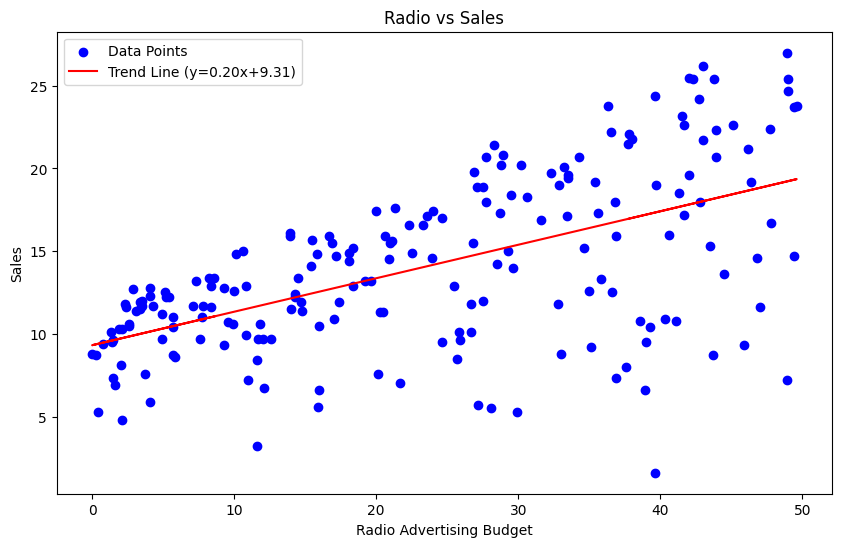

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Radio'], df['Sales'], color='blue', label='Data Points')
m, b = np.polyfit(df['Radio'], df['Sales'], 1)
plt.plot(df['Radio'], m*df['Radio'] + b, color='red', label=f'Trend Line (y={m:.2f}x+{b:.2f})')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.legend()
plt.show()